# Episode 1

In [18]:
from sympy import *

rho, Lambda, mu = symbols('rho Lambda mu')

A = Matrix([[0, 0, 0, -(Lambda + 2*mu), 0, 0, -Lambda, 0, -Lambda], [0, 0, 0, 0, -mu, 0, 0, 0, 0],
[0, 0, 0, 0, 0, -mu, 0, 0, 0], [-rho**-1, 0, 0, 0, 0, 0, 0, 0, 0], [0, -rho**-1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, -rho**-1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]])
print(A.eigenvals())

{-sqrt(mu/rho): 2, sqrt(mu/rho): 2, -sqrt(Lambda/rho + 2*mu/rho): 1, sqrt(Lambda/rho + 2*mu/rho): 1, 0: 3}


# Episode 2

[ 374.99999981  523.99999995  671.00000007  816.00000013  958.99999989
 1100.00000002 1239.00000001 1375.99999989 1511.00000008 1644.00000007
 1774.99999998 1904.00000003 2030.99999991 2156.00000013 2279.0000001
 2400.00000021 2518.99999997 2636.00000014 2750.99999984 2863.99999977
 2975.00000005 3083.99999998 3190.99999995 3296.00000021 3398.99999982
 3499.99999981 3598.99999994 3695.99999999 3790.99999975 3884.00000007
 3974.99999991 4064.         4151.00000022 4236.00000013 4319.00000002
 4399.99999988 4479.00000001 4555.99999982 4630.99999989 4703.99999987
 4775.00000009 4844.         4910.99999995 4975.99999985 5039.00000023
 5100.00000006 5159.00000011 5216.         5271.00000003 5323.99999984
 5374.99999999 5424.00000012 5470.99999999 5515.99999977 5558.99999998
 5600.00000009 5639.0000001  5676.00000003 5711.00000003 5744.00000009
 5775.0000003  5803.99999989 5830.99999997 5856.00000002 5878.99999987
 5900.00000006 5918.99999997 5936.00000007 5951.0000001  5964.00000012
 5975.0

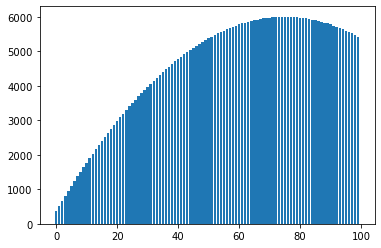

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

A = np.genfromtxt('large.txt', skip_header=1, skip_footer=1)
n = np.genfromtxt('large.txt', skip_footer=len(A)+1)
b = np.genfromtxt('large.txt', skip_header=len(A)+1)
x = linalg.solve(A, b)

fig, ax = plt.subplots()
print(x)
ax.bar(np.arange(n), x)
plt.show()

# Episode 3

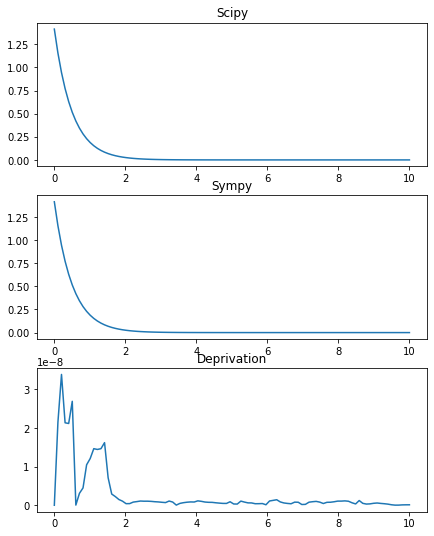

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import *

def dydx(y, x):
    return (-2*y)

y = Function('y')
x = symbols('x')
eq = Eq(Derivative(y(x), x), -2*y(x))
eq1 = dsolve(eq, y(x), ics={y(0):2**0.5})
eq2 = lambdify(x, eq1.rhs, "numpy")

t = np.linspace(0, 10, 100)
y1 = odeint(dydx, 2**0.5, t)
y1 = np.array(y1).flatten()

fig, ax = plt.subplots(3, 1, figsize = (7,9))
ax[0].plot(t, y1)
ax[0].set_title('Scipy')
ax[1].plot(t, eq2(t))
ax[1].set_title('Sympy')
ax[2].plot(t, abs(eq2(t)-y1))
ax[2].set_title('Deprivation')
plt.show()